<a href="https://colab.research.google.com/github/lalan07/EDA-TESLA-CODE-PROJECT/blob/main/project_new_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# importing pandas library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [35]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
file_path = '/content/drive/MyDrive/EDA PROJECT/Copy of Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

In [39]:
hotel_df = pd.read_csv(file_path)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


                                                     CHECKING FOR COLUMNS

In [40]:
print(list(hotel_df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [41]:
df= hotel_df.copy()

# data cleaning

In [42]:
null_columns=['agent','children','company']
for colm in null_columns:
  df[colm].fillna(0,inplace=True)

In [43]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

                                                   COUNTING FOR DUPLICATE ROWS

In [44]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

SO NUMBER OF DUPLICATE ROWS IS 31994

###                         DROPPING THE DUPLICATE ROWS

In [45]:
df= df.drop_duplicates()

###      NOW THERE IS NO DUPLICATE ROWS

In [46]:
df.duplicated().value_counts()

False    87396
dtype: int64

In [47]:
df.shape

(87396, 32)

In [48]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

###          CHECKING FOR NUMBERS OF NULL VALUES AND THERE LOCATION

In [19]:
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,country,452
1,hotel,0
2,previous_cancellations,0
3,reservation_status,0
4,total_of_special_requests,0
5,required_car_parking_spaces,0


###           VISUALIZING THE LOCATION OF MISSING VALUES

In [49]:
print(list(df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


### **Q1 Hotel which is most preffered**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

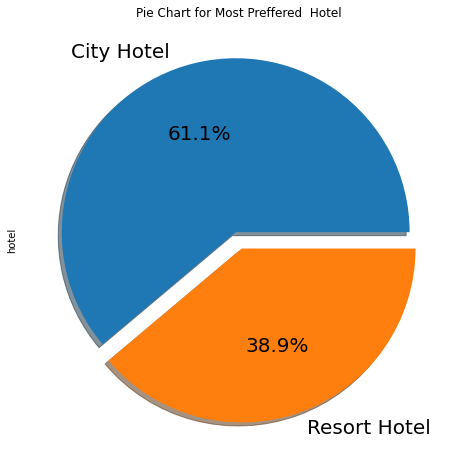

In [25]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

### city hotel has most booking

###**Q2 what is percentage of repeated guest**

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

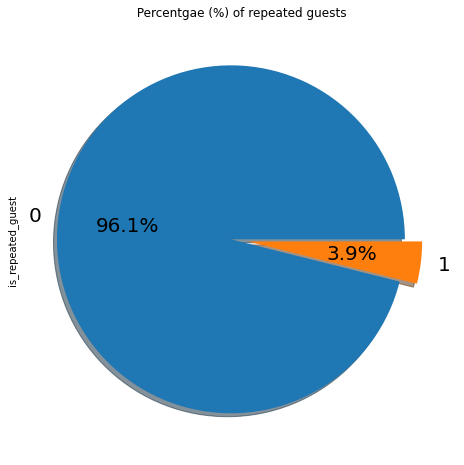

In [26]:
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

### so repeated guest is only 3.9%

### **Q3.Meal that is most preffered**

Text(0.5, 1.0, 'Preferred Meal Type')

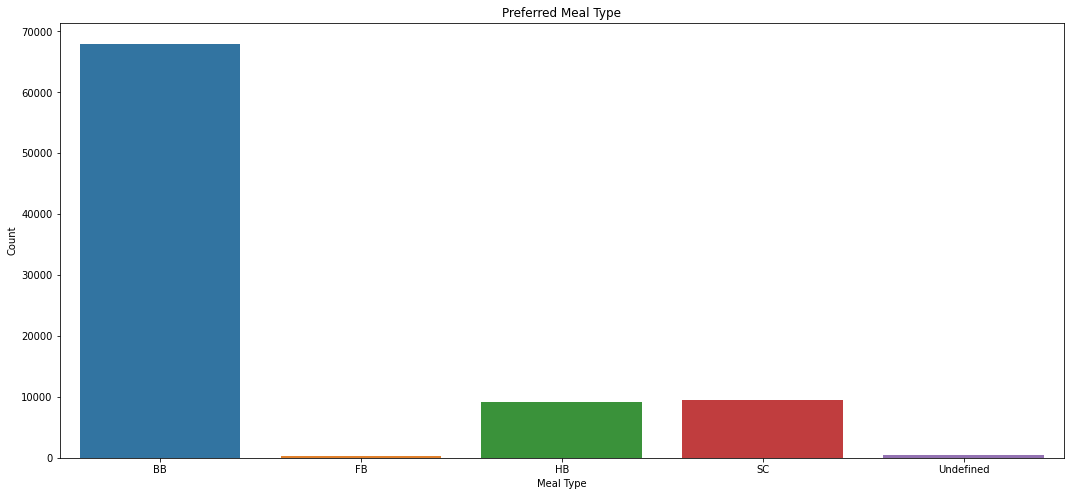

In [27]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:

BB - (Bed and Breakfast)
HB- (Half Board)
FB- (Full Board)
SC- (Self Catering) ### Observation ### So the most preferred meal type by the guests is BB( Bed and Breakfast) ### HB- (Half Board) and SC- (Self Catering) are equally preferred.

so bed and breakfast are most preffered

### **Q4.Rooms which is most preffered by customers**

Text(0.5, 1.0, 'Rooms which are most preffered')

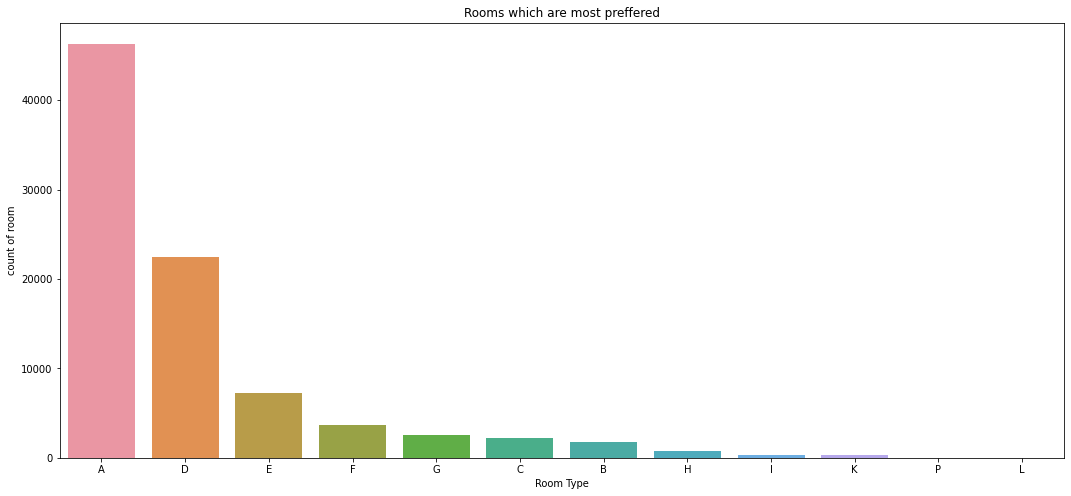

In [30]:
# size of plot
plt.figure(figsize=(18,8))
#plot the graph 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  setting x coordinate 
plt.xlabel('Room Type')
#  setting y coordinate
plt.ylabel('count of room')
#setting plot title
plt.title("Rooms which are most preffered")

### So room type A Is most preffered

### **Q5.month where booking was at peak**

In [31]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'Number of bookings')

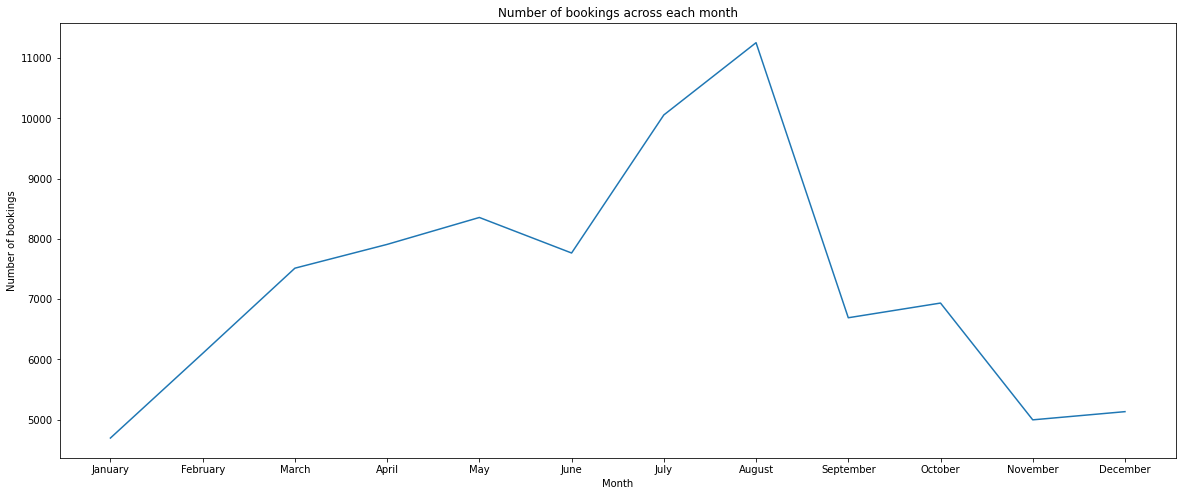

In [32]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

### Most repeated guest for each hotel

Text(0.5, 1.0, 'Most repeated guests for each hotel')

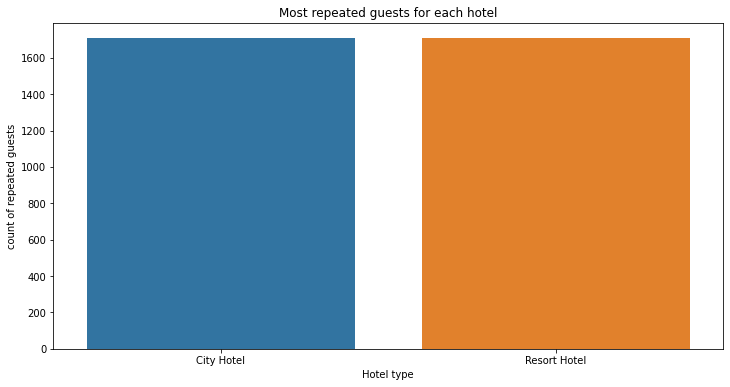

In [53]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=df[df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(12,6))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

### ** Q.Market segment that has highest cancellation rate?**

In [54]:
market_segment_df=df[df['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

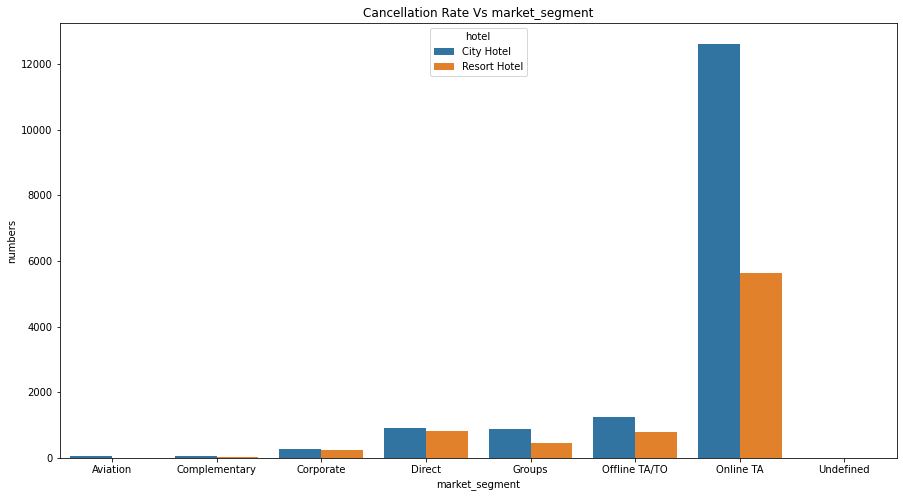

In [59]:
#set plotsizde and plot barchart
plt.figure(figsize=(15,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('numbers')
plt.title('Cancellation Rate Vs market_segment')

### Online TA/TO has highest cancellation rate

### ADR in different market segment

Text(0.5, 1.0, 'Adr in different market segment')

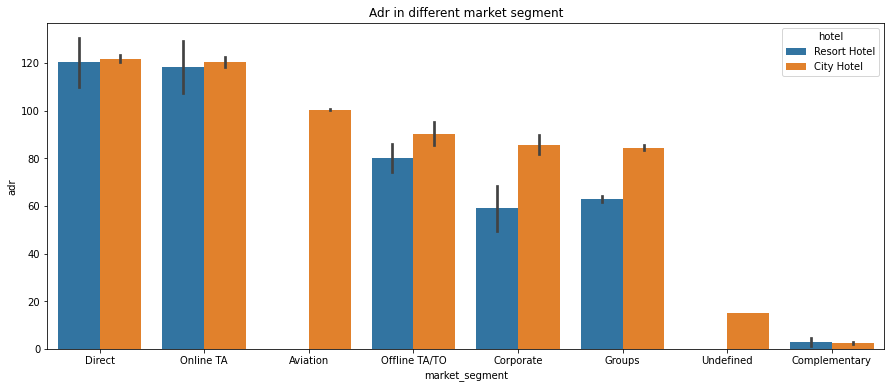

In [70]:
Grupby=df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(15,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr in different market segment')